# **KNN Classification**

The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used as for both:
  - classification and 
  - regression problems.
   
KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).
 
In this project we will classify movies based on various features using following steps:

- Step 1: Data Preprocessing & Exploration.

- Step 2: Data Visualization.

- Step 3: Data Training & Model Creation.

- Step 4: Performance Evaluation.

We will firstly preprocess & explore the data that we have and check for any null or missing values. If found then we'll clean tha data.

Then visualize it for better understanding and draw insights from it.

Then we'll proceed by data training i.e. spliting data into training and testing data.

Then train our model by providing training data and once the model will be trained, we will import & initialize the classifier, fit the data into it and perform prediction for the test data.

At last, we will evaluate the performance of the algorithms by error check and accuracy check.

- For the dataset being used in this project [click here](https://www.kaggle.com/balakrishcodes/others?select=Movie_classification.csv) 

### **Step 1: Data Preprocessing & Exploration.**

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('/content/Movie_classification.csv')
data

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,492480,NO,186.96,243.584,Action,27,561,44800,0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,482875,YES,132.24,263.296,Action,20,600,41200,0
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,532239,NO,109.56,243.824,Comedy,31,576,47800,0
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,496077,YES,158.80,303.520,Comedy,47,607,44000,0


In [3]:
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [4]:
data.tail()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
501,21.2526,78.86,0.427,36624.115,142.6,8.68,8.775,8.620,8.970,6.8,492480,NO,186.96,243.584,Action,27,561,44800,0
502,20.9054,78.86,0.427,33996.600,150.2,8.78,8.945,8.770,8.930,7.8,482875,YES,132.24,263.296,Action,20,600,41200,0
503,21.2152,78.86,0.427,38751.680,164.5,8.83,8.970,8.855,9.010,7.8,532239,NO,109.56,243.824,Comedy,31,576,47800,0
504,22.1918,78.86,0.427,37740.670,162.8,8.73,8.845,8.800,8.845,6.8,496077,YES,158.80,303.520,Comedy,47,607,44000,0
505,20.9482,78.86,0.427,33496.650,154.3,8.64,8.880,8.680,8.790,6.8,518438,YES,205.60,203.040,Comedy,45,604,38000,0


In [5]:
data.shape

(506, 19)

In [6]:

data.columns

Index(['Marketing expense', 'Production expense', 'Multiplex coverage',
       'Budget', 'Movie_length', 'Lead_ Actor_Rating', 'Lead_Actress_rating',
       'Director_rating', 'Producer_rating', 'Critic_rating', 'Trailer_views',
       '3D_available', 'Time_taken', 'Twitter_hastags', 'Genre',
       'Avg_age_actors', 'Num_multiplex', 'Collection', 'Start_Tech_Oscar'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [8]:
data.describe()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,494.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,157.391498,260.832095,39.181818,545.043478,45057.707510,0.545455
std,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,31.295161,104.779133,12.513697,106.332889,18364.351764,0.498422
min,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,10000.000000,0.000000
25%,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,132.300000,223.796000,28.000000,465.000000,34050.000000,0.000000
50%,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,160.000000,254.400000,39.000000,535.500000,42400.000000,1.000000
75%,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.890000,283.416000,50.000000,614.750000,50000.000000,1.000000
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,100000.000000,1.000000


In [9]:
data.isnull().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
Start_Tech_Oscar        0
dtype: int64

In [10]:
data['Time_taken'].isnull().sum()

12

In [11]:
data['Time_taken'].mean()

157.39149797570855

In [12]:
data['Time_taken'].fillna('157',inplace=True)

In [13]:
data['Time_taken'].isnull().sum()

0

In [14]:
#Again check for null values
data.isnull().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
Start_Tech_Oscar       0
dtype: int64

In [15]:
data.isnull().sum().sum()

0

There are no null or missing values i.e. we can now proceed with further steps.

### **Step 2: Data Visualization**

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

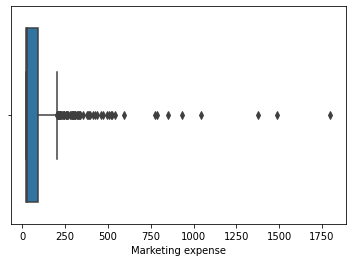

In [17]:
sns.boxplot(x=data['Marketing expense'])

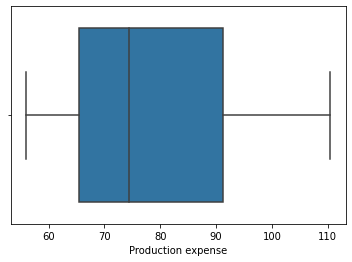

In [18]:
sns.boxplot(x=data['Production expense'])

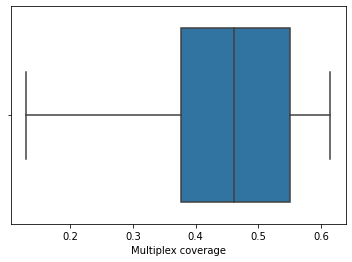

In [19]:
sns.boxplot(x=data['Multiplex coverage'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


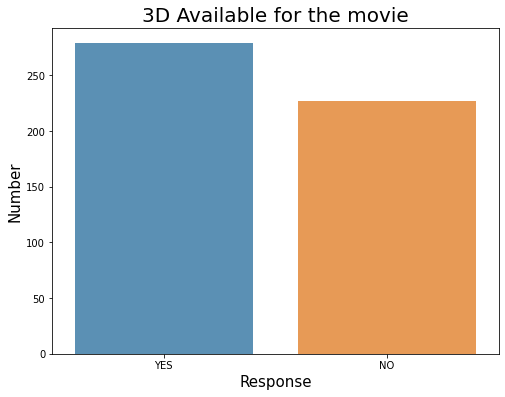

In [20]:
count=data['3D_available'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(count.index,count.values, alpha=0.8)
plt.title("3D Available for the movie", fontsize=20)
plt.ylabel('Number', fontsize=15)
plt.xlabel("Response", fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


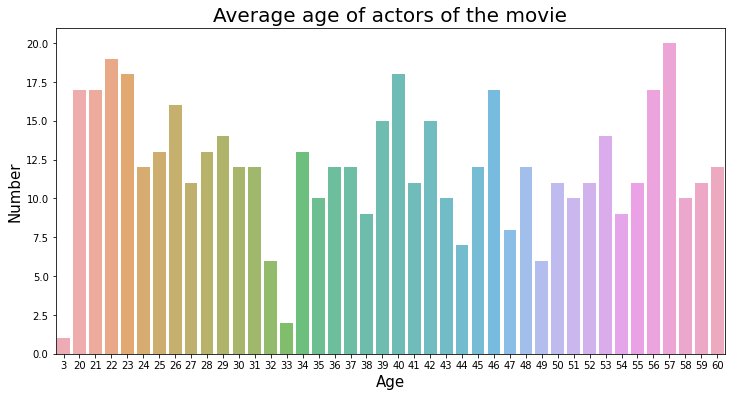

In [21]:
count=data['Avg_age_actors'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.8)
plt.title("Average age of actors of the movie", fontsize=20)
plt.ylabel('Number', fontsize=15)
plt.xlabel("Age", fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


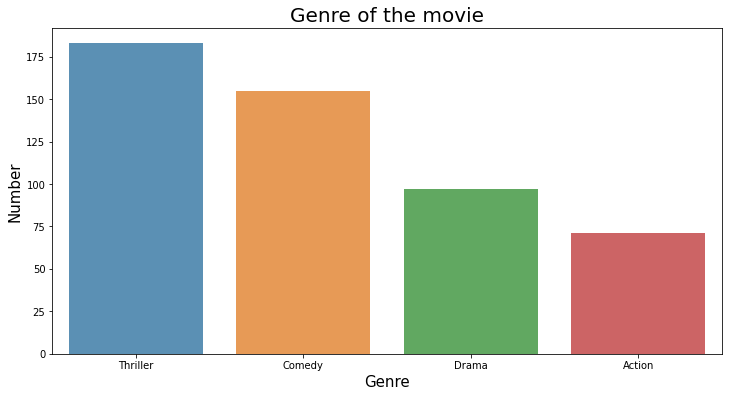

In [22]:
count=data['Genre'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.8)
plt.title("Genre of the movie", fontsize=20)
plt.ylabel('Number', fontsize=15)
plt.xlabel("Genre", fontsize=15)
plt.show()

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    object 
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [24]:
data1=data.drop(['3D_available','Time_taken','Genre'],axis=1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Twitter_hastags      506 non-null    float64
 12  Avg_age_actors       506 non-null    int64  
 13  Num_multiplex        506 non-null    int64  
 14  Collection           506 non-null    int64  
 15  Start_Tech_Oscar     506 non-null    int

In [25]:
#converting data into int datatype to avoid errors below.
prepareddata=data1.astype(int)
prepareddata.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20,59,0,36524,138,7,8,7,7,7,527367,223,23,494,48000,1
1,20,69,0,35668,152,7,7,7,7,7,494055,243,42,462,43200,0
2,20,69,0,39912,134,7,7,7,7,7,547051,2022,38,458,69400,1
3,20,59,0,38873,119,6,7,6,7,8,516279,225,45,472,66800,1
4,21,59,0,39701,127,6,7,6,7,8,531448,225,55,395,72400,1


### **Step 3: Data Training & Model Creation**

In [26]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
# Here, x is the data which will have features for classification and y will have our target.
x=prepareddata.drop(['Start_Tech_Oscar'],axis=1)
y=prepareddata['Start_Tech_Oscar']

In [27]:
# Split data into training data and testing data.
#Ratio used for splitting training and testing data is 8:2 respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=100)

Model Creation using KNN algorithm:

In [31]:
#importing knn model
from sklearn.neighbors import KNeighborsClassifier
clfr=KNeighborsClassifier(n_neighbors=20)

In [32]:
#Fitting data into the model.
clfr.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [33]:
# Making predictions 
pred= clfr.predict(x_test)

In [34]:
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1])

### **Step 4: Performance Evaluation**

In [35]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("Model\t\t\t    RootMeanSquareError   \t\t   Accuracy of the model") 
print("""KNN                      \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred)), clfr.score(x_train,y_train)))

Model			    RootMeanSquareError   		   Accuracy of the model
KNN                      		 0.6493 	 		 0.6040


Conclusion drawn:

- For this project i.e. Movies classification we have used KNN Classification algorithm which is one of the simple and easy classification algorithms.

- The accuracy of KNN model is 60.40%

- The error for KNN model is 0.6493



